In [1]:
%matplotlib inline
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
local_dir = os.path.join("/DATA",os.environ.get("USER"),"MNIST_data")
os.makedirs(local_dir,mode=0o755, exist_ok=True)


In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets(local_dir, one_hot=True)

Extracting /DATA/marcin.kostur/MNIST_data/train-images-idx3-ubyte.gz
Extracting /DATA/marcin.kostur/MNIST_data/train-labels-idx1-ubyte.gz
Extracting /DATA/marcin.kostur/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /DATA/marcin.kostur/MNIST_data/t10k-labels-idx1-ubyte.gz


## Sieć wielowarstwowa

Dodajemy drugą warstwę percetronów. Musimy dodać nową zmienną określającą wartości na tej wastwie oraz dodatkowe wagi. Zauważmy, że mamy już dużo więcej wag niż w przypadku sieci jednowarstwowej.


In [4]:
x = tf.placeholder(tf.float32, [None, 784])

W1 = tf.Variable( tf.random_normal([784, 200], stddev=0.1,dtype=tf.float32) )
b1 = tf.Variable(tf.zeros([200],dtype=tf.float32))

W = tf.Variable( tf.random_normal([200, 10], stddev=0.1,dtype=tf.float32) )
b = tf.Variable(tf.zeros([10],dtype=tf.float32))

In [5]:
y1 = tf.nn.relu(tf.matmul(x, W1) + b1)
y = tf.nn.softmax(tf.matmul(y1, W) + b)


In [6]:
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_,logits=tf.matmul(y1, W) + b))

In [7]:
#train_step = tf.train.GradientDescentOptimizer(0.005).minimize(cross_entropy)
train_step = tf.train.AdamOptimizer(learning_rate=0.003).minimize(cross_entropy)


In [8]:
config = tf.ConfigProto()
#config.gpu_options.allow_growth = True
config.gpu_options.per_process_gpu_memory_fraction = 0.05

sess = tf.InteractiveSession(config=config)
tf.global_variables_initializer().run()


In [9]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


In [10]:
%%time 
hst = []
hst2 = []
hst3 = []
tf.global_variables_initializer().run()

for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    #hst.append(  sess.run(cross_entropy,feed_dict={x: batch_xs, y_: batch_ys}) )
    #hst.append( sess.run(accuracy, feed_dict={y: mnist.test.images, y_: mnist.test.labels}) )
    
    if i%20==0 and True:
        hst.append(  sess.run(cross_entropy,feed_dict={x: batch_xs, y_: batch_ys}) )
        hst2.append(sess.run(accuracy, feed_dict={x: mnist.train.images, y_: mnist.train.labels}))
        hst3.append(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))


CPU times: user 9.98 s, sys: 3.26 s, total: 13.2 s
Wall time: 9.25 s


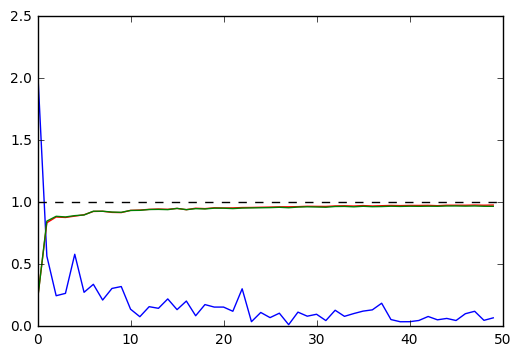

In [11]:
plt.plot(hst)
plt.plot(hst2,'r')
plt.plot(hst3,'g')

plt.axhline(1.0,color='black', linestyle='--')

In [12]:
print(sess.run(accuracy, feed_dict={x: mnist.train.images, y_: mnist.train.labels}))


0.981182


In [13]:
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))


0.9714


(0.9, 1)

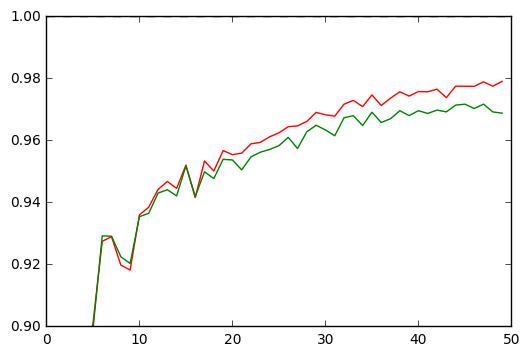

In [14]:
plt.plot(hst2,'r')
plt.plot(hst3,'g')

plt.axhline(1.0,color='black', linestyle='--')
plt.ylim(0.9,1)